<h1 style='color:#15284C; font-size:30px'><center>Project Thesis - First Internship</center></h1>

<h3 style='color:#15284C;'><center> Logistic Regression </center></h3>

<h3 style='color:#15284C;'> Import Dependencies </h3>

In [1]:
#array ,linear algebra, fourier transform, and matrices.
import numpy as np
# merging, reshaping, selecting, as well as data cleaning, and data wrangling features.
import pandas as pd
#data visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
#importing databse
import sqlite3

#regular expression
import re
%matplotlib inline 

#natural language processing library
import nltk

#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#word tokenization
from nltk import word_tokenize
#sentence tokenization
from nltk import sent_tokenize

#part of speect tagging
from nltk import pos_tag

#remove stop word in english
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#library to remove punctuation

#string
import string

#Sentiment Analysis 
from textblob import TextBlob

#emojiii
import emoji
#box plot in feedback analysis
import plotly.express as px

#implement data preprocessing and train the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

<h3 style='color:#15284C;'>Load Dataset</h3>

In [2]:
#read dataset
data = pd.read_csv('dataset/last_update_dataset.csv')
data1 = pd.read_csv('dataset/secondary_cleaned_data.csv')
data2 = pd.read_csv('dataset/secondary_cleaned_data_1.csv')

In [3]:
#set full display all features
pd.set_option('display.max_columns', None)

In [4]:
data1.drop('Unnamed: 0', axis=1, inplace=True)
data2.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
#check primary data
data1.tail(5)

,feedback,sentiment
242,much pressure handle,0
243,none,0
244,online classes arent able gain students attent...,0
245,home,0
246,much interactive,0


In [6]:
data2.head()

,feedback,sentiment
0,teacher punctual also give us practical knowle...,0
1,excellent lectures delivered teachers teachers...,0
2,teachers give us information required improve ...,0
3,yes,0
4,good punctual,0


<h3 style='color:#15284C;'>Data Preparation</h3>

In [7]:
#rename the columns
data.rename(columns={
    'Timestamp':'time_stamp',
    'Username':'user_name',
    'I agree':'terms_conditions',
    'Gender':'gender',
    'Age':'age',
    'Phone Number / Tel':'tel',
    'Your Major ':'major',
    'Education Levels':'education_levels',
    'University/Institution':'university',
    'Your Current Locality When Studying Online Learning':'local',
    'Feedback on online/distance learning (During COVID-19)':'feedback',
    'Emotional of online/distance learning (During COVID-19)':'emotion',
    'Telegram':'telegram',
    'Email Address':'email_address',
     'Messenger':'messenger',
     'University Messenger':'university_messenger',
     'Other Digital Communication Tools ':'other_com_tools',
     'Google Meet':'google_meet',
     'Zoom':'zoom',
     'Microsoft Team':'microsoft_team',
     'Google Classroom':'google_classroom',
     'Other Online Management Platforms':'other_manage_tools',
     'I have highly attended school works.':'school_works',
     'On average, How much time do you spend per day on online learning? ':'learning_time',
     'I prefer to study online more than the physical class':'online_physical_class',
     'I have been feeling stressed since I started studying online.':'feeling_stress',
     'During the online learning, I was received more confidence in solving personal problems.':'solving_problem',
     'Communication with classmates and teachers during online learning':'communication',
     'I can ask the teacher for help quickly when I have a problem.':'asking_teacher',
     'I get more difficulties during online learning':'get_difficulties',
     'I meet difficulties during online learning':'difficulties',
     'My daily online learning process is working smoothly':'online_learning_smoothly',
     'What are you mostly using digital devices with online learning?':'digital_devices',
     'On average, how much have you paid per month on wifi or hotspot?':'internet_payment',
     'I encountered/meet technical difficulties while studying online.':'met_tech_difficulties',
     'Online learning can completely replace hands-on classroom learning, even if COVID-19 status is terminated.':'online_replace_offline',
     'I prefer to study face-to-face class (offline class)':'prefer_face_to_face',
     'I prefer to study online class':'prefer_online_class',
     'I prefer to study online and offline class':'prefer_both'
    }, inplace=True)

In [8]:
#check the data types
data.dtypes

time_stamp                  object
user_name                   object
terms_conditions            object
gender                      object
age                         object
tel                         object
major                       object
education_levels            object
university                  object
local                       object
feedback                    object
emotion                     object
telegram                     int64
email_address                int64
messenger                    int64
university_messenger         int64
other_com_tools             object
google_meet                  int64
zoom                         int64
microsoft_team               int64
google_classroom             int64
other_manage_tools          object
school_works                object
learning_time               object
online_physical_class       object
feeling_stress              object
solving_problem             object
communication               object
asking_teacher      

In [9]:
#check the features info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   time_stamp                503 non-null    object
 1   user_name                 503 non-null    object
 2   terms_conditions          503 non-null    object
 3   gender                    503 non-null    object
 4   age                       503 non-null    object
 5   tel                       460 non-null    object
 6   major                     503 non-null    object
 7   education_levels          503 non-null    object
 8   university                503 non-null    object
 9   local                     503 non-null    object
 10  feedback                  496 non-null    object
 11  emotion                   503 non-null    object
 12  telegram                  503 non-null    int64 
 13  email_address             503 non-null    int64 
 14  messenger                 

In [10]:
#check the dataset null or not
data.isnull().any()

time_stamp                  False
user_name                   False
terms_conditions            False
gender                      False
age                         False
tel                          True
major                       False
education_levels            False
university                  False
local                       False
feedback                     True
emotion                     False
telegram                    False
email_address               False
messenger                   False
university_messenger        False
other_com_tools              True
google_meet                 False
zoom                        False
microsoft_team              False
google_classroom            False
other_manage_tools           True
school_works                False
learning_time               False
online_physical_class       False
feeling_stress              False
solving_problem             False
communication               False
asking_teacher              False
get_difficulti

In [11]:
#sum the dataset is null 
data.isnull().sum()

time_stamp                    0
user_name                     0
terms_conditions              0
gender                        0
age                           0
tel                          43
major                         0
education_levels              0
university                    0
local                         0
feedback                      7
emotion                       0
telegram                      0
email_address                 0
messenger                     0
university_messenger          0
other_com_tools             262
google_meet                   0
zoom                          0
microsoft_team                0
google_classroom              0
other_manage_tools          366
school_works                  0
learning_time                 0
online_physical_class         0
feeling_stress                0
solving_problem               0
communication                 0
asking_teacher                0
get_difficulties              0
difficulties                  0
online_l

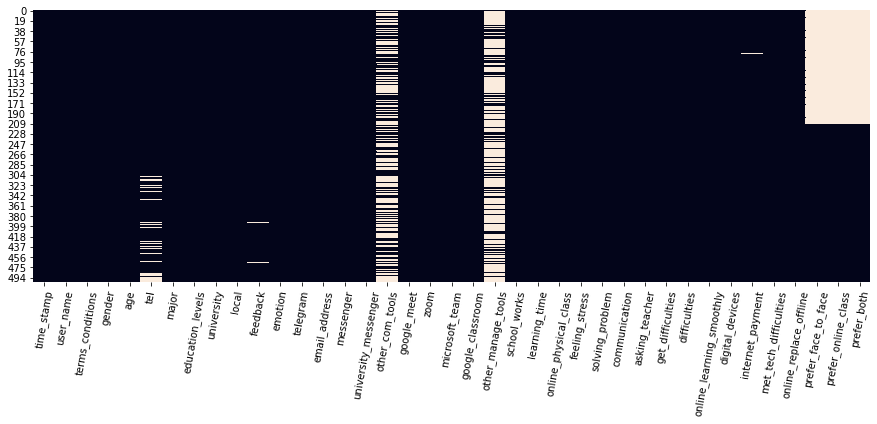

In [12]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation='80')
plt.show()

In [13]:
#check duplicates values number
def check_duplicate_values(data):
    print("**"*54)
    print("Duplicated values, there are: ", data.duplicated().sum())
    print("**"*54)
    
#check duplicates values
#call above function

check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  0
************************************************************************************************************


In [14]:
#drop the features are not mostly helpful
data.drop(['user_name','terms_conditions','tel','other_com_tools','other_manage_tools'],
         axis=1, inplace=True)

In [15]:
#define a variable and copy dataset
df_sent = data.copy()

In [16]:
# Loading dictionary of smilies
def load_dict_smileys():
 
 return {
 ":-)": "smiley",
 ":)" : "smiley",
 ":D": "smiley",
 "xD": "smiley",
 ":’)" : "smiley",
 ":’D" : "smiley",
 ":3" : "smiley",
 ":]" : "smiley",
 ":^)" : "smiley",
 ":-]" : "smiley",
 ":-3" : "smiley",
 ":->" : "smiley",
 ":))" : "smiley",
 "8-)" : "cool",
 "8)" : "cool",
 "8-D" : "cool",
 "B)" : "cool",
 "BD" : "cool",
 ":-}": "smiley",
 ":>" : "smiley",
 ":}" : "smiley",
 ":o)" : "smiley",
 ":c)" : "smiley",
 "=)" : "smiley",
 "=D" : "smiley",
 "=]" : "smiley",
 ":-D" : "smiley",
 "XD" : "smiley",
 ":o" : "surprised",
 ":O" : "surprised",
 "=o" : "surprised",
 "=O" : "surprised",
 ":0" : "surprised",
 ":(" : "sad",
 ":C" : "sad",
 ":c" : "sad",
 "=(" : "sad",
 "=c" : "sad",
 "=C" : "sad",
 ":-(" : "sad",
 ":-c" : "sad",
 ":-C" : "sad",
 ":-<" : "sad",
 ":<" : "sad",
 ":[" : "sad",
 ":{" : "sad",
 ":’(" : "crying",
 ":P" : "playful",
 ":p" : "playful",
 "xP" : "playful",
 "XP": "playful",
 "=P": "playful",
 "=p" : "playful",
 "xp": "playful",
 "xb": "playful",
 "❤": "love",
 "</3": "sad",
 ":/": "worried",
 ":-/" : "worried"
}

In [17]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

cachedStopWords = stopwords.words("english")
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text


#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))
    
#remove space
def remove_space(series):
    series.replace(" ", "", inplace=True)
    
            
#function to clean the word of any html-tags
def remove_html(sentence): 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, ' ', sentence)
    return clean_text

#remove url from text
def remove_urls(text):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', text)

def remove_abbreviations(text):
    tokens = text.split(" ")
    j = 0
    for token in tokens:
        file_name = "<path to CSV file>"
        with open(file_name, "r") as fh:
            reader = csv.reader(fh)
            for row in reader:
                if row[0] == token:
                    tokens[j] = row[1]
                    fh.close()
                    j = j + 1
    return "".join(tokens)

# Removing smilies and emojis
def remove_emoticons(text):
    smilies = load_dict_smileys()
    split_tweet = text.split(" ")
    for key,val in smilies.items():
        if key in text:
            new_tweet = text.replace(key, val)
            text = new_tweet
            text = emoji.demojize(text)
            text = ' '.join(text.split())
    return text

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [18]:
#create a function to remove punctuation
def remove_punctuation(text):
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation),'', str(text))
    text = re.sub('\w*\d\w*', '', str(text))
    text = re.sub('[‘’“”…]', '', str(text))
    text = re.sub('\n', '', str(text))
    return text
remove_pun = lambda x: remove_punctuation(x)

In [19]:
#Converting the time frame and sorting in increasing order for easyness
df_sent["time_stamp"] = pd.to_datetime(df_sent["time_stamp"])
df_sent = df_sent.sort_values(by = "time_stamp")

In [20]:
#remove white space from series of the dataset
remove_space(df_sent.feedback)

In [21]:
#convert to lowercase
df_sent['feedback'] = convert_to_lowercase(df_sent.feedback)

In [22]:
#remove Punctuation

#********************************************************************************************************
#it spends much time to run
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_punctuation(x))

In [23]:
#remove stopword
#It takes much time to run.
df_sent.feedback = df_sent.feedback.apply(remove_stopwords)

In [24]:
#remove smilies

#********************************************************************************************************
#it spends much time 
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_emoticons(x))

In [25]:
#calculate review and summanry lengthd
df_sent['feedback_length']= df_sent['feedback'].apply(text_length_calculation)

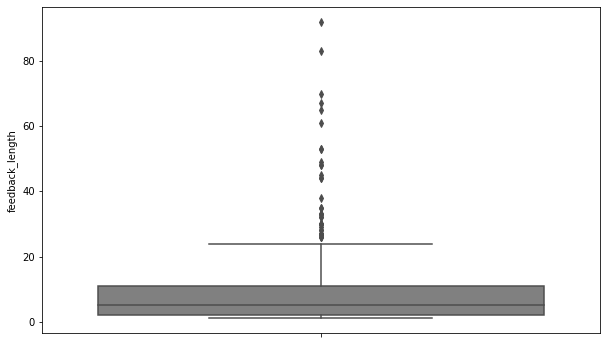

In [26]:
#check outlier of the text length
f, axes = plt.subplots(ncols=1, figsize=(10, 6))

sns.boxplot(y=df_sent['feedback_length'] ,color='grey')
plt.show()


In [27]:
#feature selecting

df_sent = df_sent[['feedback']]

In [28]:
df_sent.head()

,feedback
0,good enough compare learning school safe
1,everything good except internet stable cause s...
2,pros cons cons seem exist pros subjects requir...
3,hard little bit simulator lab
4,poor


In [29]:
#we use textblob python library to calculate the palority values of text

#call sentitment_polarity
polarity=[]
for i in df_sent['feedback']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [30]:
#insert the polarity values as a column
df_sent['polarity'] = polarity 

In [31]:
#check the sentment values
#if the polarity > 0 : Positive
#else the polarity < = : Negative
positive_sent = df_sent[df_sent['polarity'] >= 0]
negative_sent = df_sent[df_sent['polarity'] < 0]

In [32]:
#define the label of sentiment
df_sent['sentiment'] = df_sent['polarity'].apply(lambda x : 1 if x < 0 else 0)

In [33]:
#check the values of sentiment
print("*" * 50)
print("Positive Sentiment: ", positive_sent.shape)
print("Negative Sentiment: ", negative_sent.shape)
print("*" * 50)

**************************************************
Positive Sentiment:  (357, 2)
Negative Sentiment:  (146, 2)
**************************************************


In [34]:
#from sklearn.preprocessing import LabelEncoder
#label_enconder = LabelEncoder()

#label encoder for model features
#df_sent.emotion = label_enconder.fit_transform(df_sent.emotion)
#df_sent.online_physical_class = label_enconder.fit_transform(df_sent.online_physical_class)
#df_sent.feeling_stress = label_enconder.fit_transform(df_sent.feeling_stress)
#df_sent.solving_problem = label_enconder.fit_transform(df_sent.solving_problem)
#df_sent.get_difficulties = label_enconder.fit_transform(df_sent.get_difficulties)

In [35]:
df_sent.head(10)

,feedback,polarity,sentiment
0,good enough compare learning school safe,0.400000,0
1,everything good except internet stable cause s...,0.700000,0
2,pros cons cons seem exist pros subjects requir...,0.400000,0
3,hard little bit simulator lab,-0.239583,1
4,poor,-0.400000,1
5,sometimes got annoy family internet connection...,0.000000,0
6,sometime feel boring sometime feel good learning,-0.150000,1
7,feel uncomfortable stressful,-0.500000,1
8,normal,0.150000,0
9,quite hectic didnt learn much sometimes take l...,0.200000,0


In [36]:
#drop the polarity feature
df_sent.drop('polarity', axis=1, inplace=True)

In [37]:
#merge primary and secondary data
frames = [data1, df_sent, data2]
dataset = pd.concat(frames)

In [38]:
print("Sample:", dataset.shape[0])
print("**"*54)
print("Features:", dataset.shape[1])

Sample: 867
************************************************************************************************************
Features: 2


In [39]:
#drop null values
dataset.dropna(inplace=True)
dataset.isnull().sum()

feedback     0
sentiment    0
dtype: int64

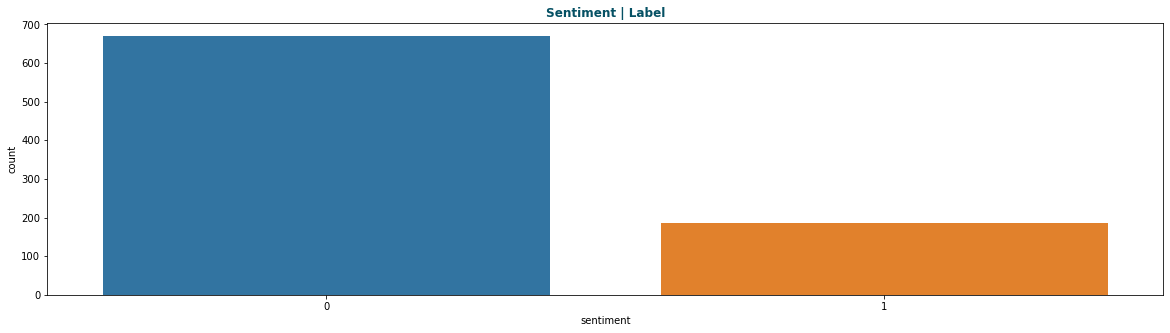

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(x='sentiment', data=dataset)
plt.title('Sentiment | Label', fontweight='bold', color='#065164')
plt.xticks(rotation='0')
plt.show()

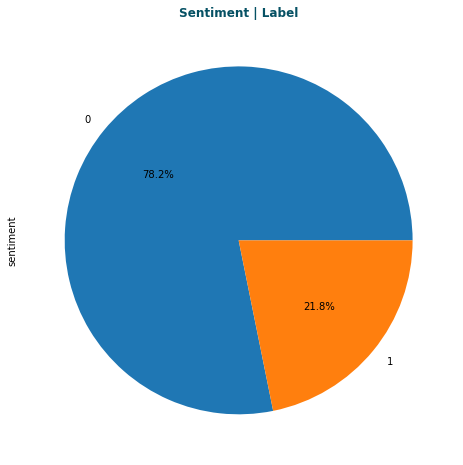

In [41]:
plt.figure(figsize=(8,8))
dataset['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sentiment | Label', fontweight='bold', color='#065164')
plt.show()

<h3 style='color:#15284C;'>Data Preprocessing</h3>

In [42]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(dataset['feedback'], dataset['sentiment'].values, test_size=0.3)

In [43]:
#count y train
Counter(y_train)

Counter({0: 478, 1: 121})

In [44]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [45]:
X_train_tf = vectorizer.transform(X_train)
X_train_tf = X_train_tf.toarray()
X_train_tf.shape

(599, 1234)

In [46]:
X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()
X_test_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
overSampler = RandomOverSampler()
X_train_os, y_train_os = overSampler.fit_resample(X_train_tf, y_train)

In [48]:
Counter(y_train_os)

Counter({0: 478, 1: 478})

In [49]:
#implement data preprocessing
#stopset = set(stopwords.words('english'))
#vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [50]:
#define the variables to split
#y = dataset.sentiment
#x = dataset.feedback

In [51]:
#apply countvectorizer into text
#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer #,TfidfVectorizer
#count_vectorizer = CountVectorizer()
#X = count_vectorizer.fit_transform(x)

In [52]:
#get the feature by names
#count_vectorizer.get_feature_names()[0:10]

In [53]:
print("X shape:", X_train_os.shape)
print("**"*54)
print("y shape:", y_train_os.shape)

X shape: (956, 1234)
************************************************************************************************************
y shape: (956,)


In [54]:
#use train test split function
# np.random.seed(0) makes the random numbers predictable
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X_train_os,y_train_os, test_size = 0.3, random_state = 100)

In [55]:
print("X Train:", x_train.shape)
print("Y Train:", y_train.shape)
print("**"*54)
print("X Test:", x_test.shape)
print("Y Test:", y_test.shape)

X Train: (669, 1234)
Y Train: (669,)
************************************************************************************************************
X Test: (287, 1234)
Y Test: (287,)


<h3 style='color:#15284C;'>Train and Evaluate Model</h3>

In [56]:
#call for MNB method 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [57]:
#get the score by METHOD 1
model.score(x_test, y_test)

0.9442508710801394

In [58]:
#let's predict the test set
y_pred = model.predict(x_test)
y_pred[0:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [59]:
#set it as dataframe
prediction_values = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted_values', 
                                                                           'actual_values'])
prediction_values.head()

,predicted_values,actual_values
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0


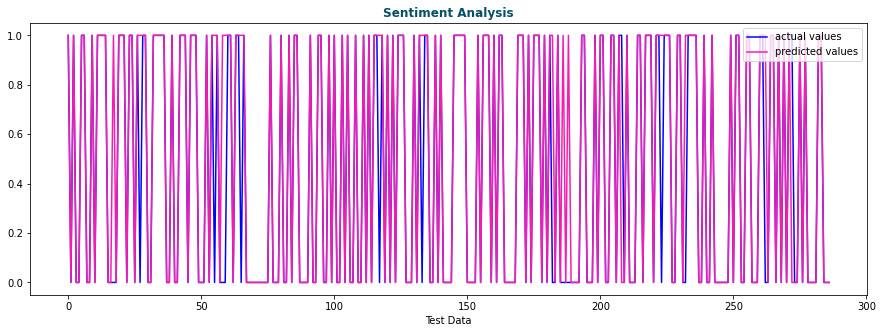

   predicted_values  actual_values
0                 1              1
1                 0              0
2                 1              1
3                 0              0
4                 0              0


In [60]:
plt.figure(figsize=(15, 5))

plt.plot(y_test, label='actual values', color='b')
plt.plot(prediction_values['predicted_values'].values, label='predicted values', color='#F91AAF')

plt.title('Sentiment Analysis',fontweight='bold', color='#065164')
plt.xlabel('Test Data')
plt.legend(loc=1)
plt.show()
print(prediction_values.head())

In [61]:
#check accuracy
from sklearn import metrics

print()
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()


Logistic Regression Accuracy: 0.9442508710801394



In [62]:
#train set accuracy
#Check train data score of model
print("*" * 20, "Train Set - Score","*"*20)
train_score = model.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 10)
print("Model Score (%) :", train_score * 100)

******************** Train Set - Score ********************
Model Score: 0.9880418535127056
********************
Model Score (%) : 98.80418535127056


In [63]:
#Check test data score of model
print("*" * 20, "Test Set - Score","*"*20)
test_score = model.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 10)
print("Model Score (%) :", test_score * 100)

******************** Test Set - Score ********************
Model Score: 0.9442508710801394
********************
Model Score (%) : 94.42508710801394


In [64]:
#METHOD 3
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       154
           1       0.90      0.98      0.94       133

    accuracy                           0.94       287
   macro avg       0.94      0.95      0.94       287
weighted avg       0.95      0.94      0.94       287



<Figure size 1080x360 with 0 Axes>

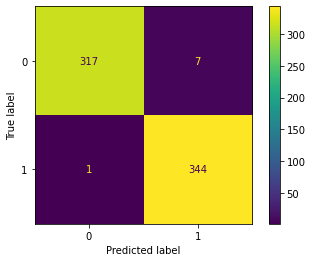

In [65]:
#plot_confusion_metrice
from sklearn.metrics import plot_confusion_matrix

plt.figure(figsize=(15,5))
plot_confusion_matrix(model, x_train, y_train);
plt.show()

#our data is imBalance dataset

<Figure size 1080x360 with 0 Axes>

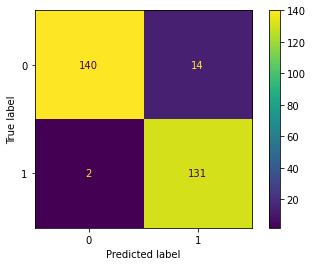

In [66]:
plt.figure(figsize=(15,5))
plot_confusion_matrix(model, x_test, y_test);
plt.show()

#our data is imBalance dataset

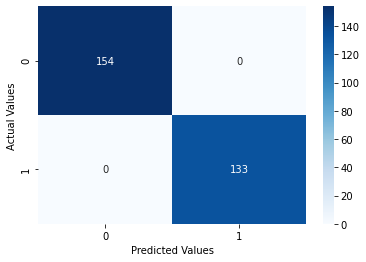

In [67]:
data = {'y_actual_values':    y_test,
        'y_predicted_values': y_pred}

df = pd.DataFrame(data, columns=['y_actual_values','y_predicted_values'])
confusion_matrix = pd.crosstab(df['y_actual_values'], df['y_actual_values'], rownames=['Actual Values'], 
                               colnames=['Predicted Values'])
sns.heatmap(confusion_matrix, annot=True,cmap='Blues', fmt='.4g')
plt.show()

In [68]:
#learning curve 
from sklearn.model_selection import learning_curve
#use learning curve
train_size, train_scores, test_scores = learning_curve(model, X_train_os, y_train_os, cv=5,# scoring='score', 
              n_jobs=-1, train_sizes=np.linspace(0.01, 1,50), verbose=1)

[learning_curve] Training set sizes: [  7  23  38  53  69  84 100 115 131 146 161 177 192 208 223 239 254 270
 285 300 316 331 347 362 378 393 408 424 439 455 470 486 501 517 532 547
 563 578 594 609 625 640 655 671 686 702 717 733 748 764]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    3.8s finished


In [69]:
#train_mean
train_mean = np.mean(train_scores, axis=1)
#train stadard deviation
train_std = np.std(train_scores, axis=1)
#test mean
test_mean = np.mean(test_scores, axis=1)
#test standard deviation
test_std = np.mean(test_scores, axis=1)

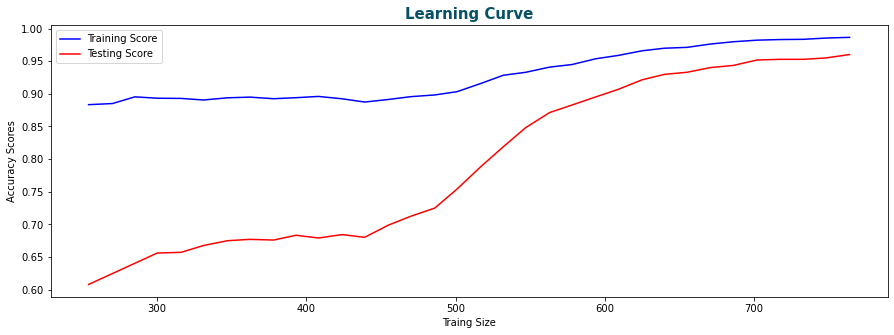

In [72]:
#plot learning curve
plt.figure(figsize=(15,5))
plt.plot(train_size, train_mean, label='Training Score', color='b')
plt.plot(train_size, test_mean, label='Testing Score', color='r')

#plt.fill_between(train_size, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
#plt.fill_between(train_size, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title("Learning Curve", color='#065164',fontsize='15', fontweight='bold')
plt.legend()
plt.xlabel("Traing Size")
plt.ylabel("Accuracy Scores")
plt.show()

In [71]:
testing = x_test[80:85]
result = model.predict(testing)
result

array([1, 0, 0, 1, 0])